# Absenteeism at Work Prediction

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('MFGEmployees4.csv')
df

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,1,Gutierrez,Molly,F,Burnaby,Baker,Bakery,Burnaby,Stores,32.028816,6.018478,36.577306,Stores
1,2,Hardwick,Stephen,M,Courtenay,Baker,Bakery,Nanaimo,Stores,40.320902,5.532445,30.165072,Stores
2,3,Delgado,Chester,M,Richmond,Baker,Bakery,Richmond,Stores,48.822047,4.389973,83.807798,Stores
3,4,Simon,Irene,F,Victoria,Baker,Bakery,Victoria,Stores,44.599357,3.081736,70.020165,Stores
4,5,Delvalle,Edward,M,New Westminster,Baker,Bakery,New Westminster,Stores,35.697876,3.619091,0.000000,Stores
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8331,8332,Coniglio,Bianca,F,Langley,Cashier,Customer Service,Langley,Stores,46.057544,4.838288,93.665111,Stores
8332,8333,Cox,Jimmie,M,Montney,Cashier,Customer Service,Fort St John,Stores,34.455490,2.427274,0.000000,Stores
8333,8334,Hawkins,Mary,F,West Vancouver,Cashier,Customer Service,West Vancouver,Stores,58.347160,4.009393,176.356940,Stores
8334,8335,Proctor,Theresa,F,Vancouver,Dairy Person,Dairy,Vancouver,Stores,43.340616,6.154837,60.321917,Stores


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8336 entries, 0 to 8335
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EmployeeNumber  8336 non-null   int64  
 1   Surname         8336 non-null   object 
 2   GivenName       8336 non-null   object 
 3   Gender          8336 non-null   object 
 4   City            8336 non-null   object 
 5   JobTitle        8336 non-null   object 
 6   DepartmentName  8336 non-null   object 
 7   StoreLocation   8336 non-null   object 
 8   Division        8336 non-null   object 
 9   Age             8336 non-null   float64
 10  LengthService   8336 non-null   float64
 11  AbsentHours     8336 non-null   float64
 12  BusinessUnit    8336 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 846.8+ KB


In [4]:
df.shape

(8336, 13)

- Rows : 8336
- Columns : 13 

In [5]:
df.describe()

,EmployeeNumber,Age,LengthService,AbsentHours
count,8336.000000,8336.000000,8336.000000,8336.000000
mean,4168.500000,42.007086,4.782910,61.283978
std,2406.540255,9.939798,2.462990,49.038365
min,1.000000,3.504743,0.012098,0.000000
25%,2084.750000,35.298748,3.575892,19.127590
50%,4168.500000,42.114924,4.600248,56.005808
75%,6252.250000,48.666943,5.623922,94.284692
max,8336.000000,77.938003,43.735239,272.530123


In [6]:
df.isna().sum()

EmployeeNumber    0
Surname           0
GivenName         0
Gender            0
City              0
JobTitle          0
DepartmentName    0
StoreLocation     0
Division          0
Age               0
LengthService     0
AbsentHours       0
BusinessUnit      0
dtype: int64

No null values found

In [7]:
df.duplicated().sum()

0

There are no duplicated values 

In [8]:
df.columns

Index(['EmployeeNumber', 'Surname', 'GivenName', 'Gender', 'City', 'JobTitle',
       'DepartmentName', 'StoreLocation', 'Division', 'Age', 'LengthService',
       'AbsentHours', 'BusinessUnit'],
      dtype='object')

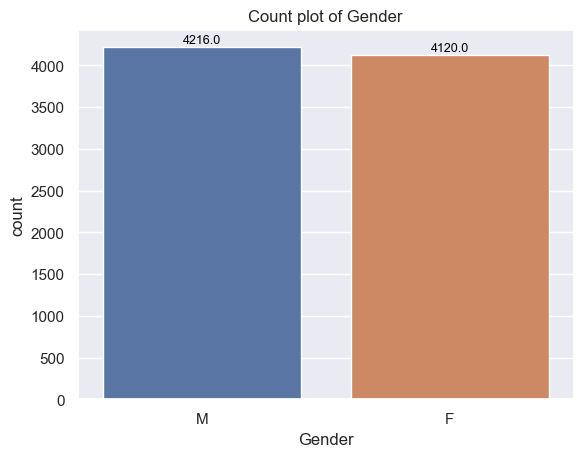

In [9]:
value_counts_order = df['Gender'].value_counts().index
plt.title(f'Count plot of Gender')
ax = sns.countplot(x=df['Gender'], order=value_counts_order)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xlabel('Gender')
plt.show()

We can see that there is ~ 50-50 distribution between male and female 

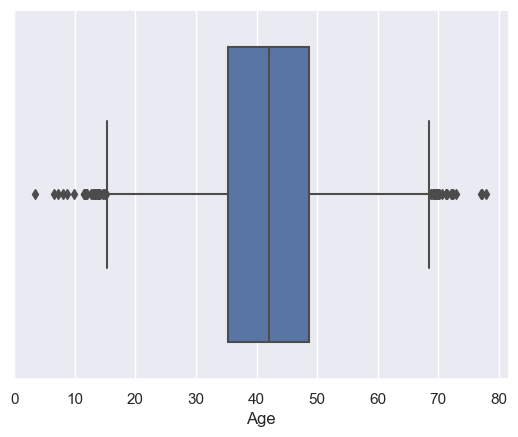

In [10]:
sns.boxplot(x = 'Age', data = df); plt.show()

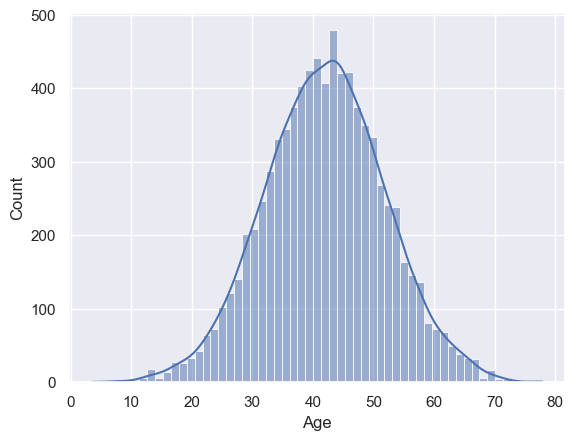

In [11]:
sns.histplot(x = 'Age', data = df, kde= True); plt.show()

The distribution looks like a Normal Dist. 
with the median around 45 years  

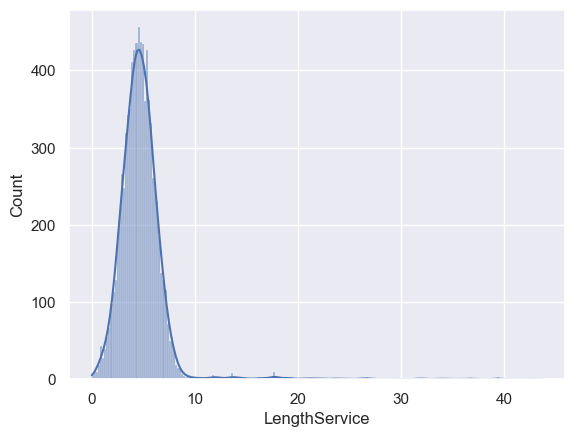

In [12]:
sns.histplot(x = 'LengthService', data = df, kde= True); plt.show()

In [13]:
len(df['City'].unique())

243

In [14]:
def make_top_ (col , top):
    top_ = df[f'{col}'].value_counts().head(top).plot(kind= 'bar', title = f'Top {top} {col}');
    for p in top_.patches:
        top_.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                    textcoords='offset points')

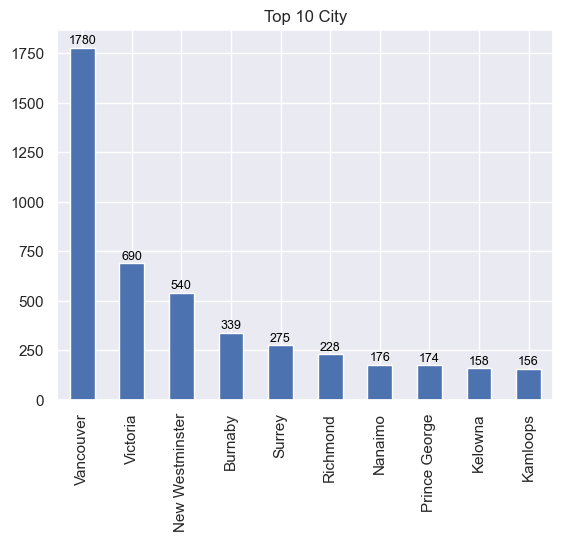

In [15]:
top_cities = make_top_('City',10)

The top Cities are: 
- Vancouver 
- Victoria 
- New Westminister 

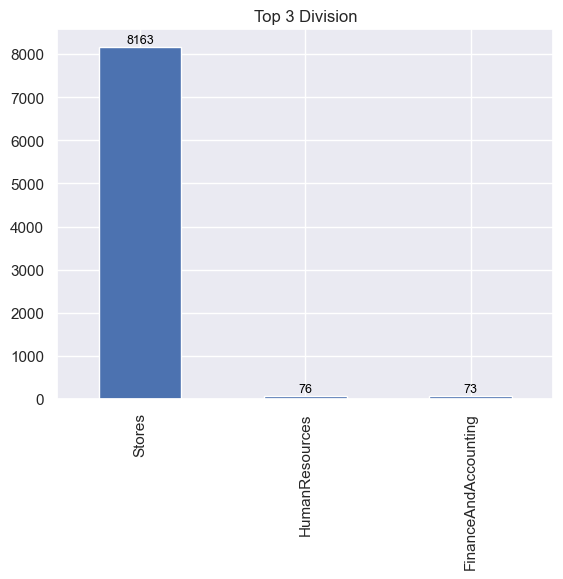

In [16]:
top_divisions = make_top_('Division',3)

There is an imbalence of Data here and most of the Division is 'Stores'

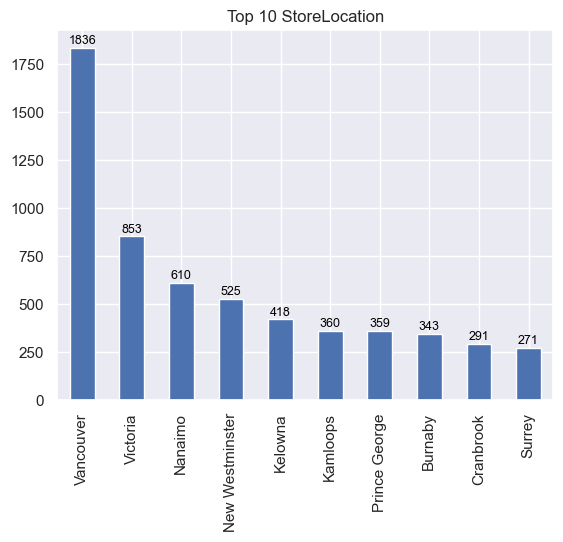

In [17]:
top_StoreLocation = make_top_('StoreLocation',10)

We can see that it is very similar to the City

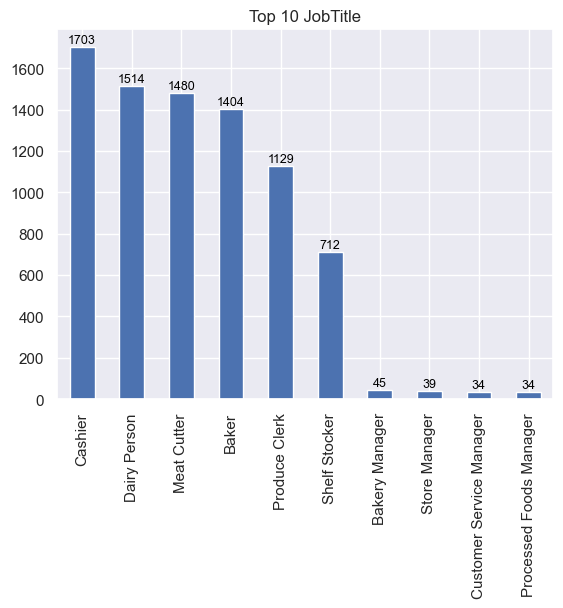

In [18]:
top_JobTitle = make_top_('JobTitle',10)

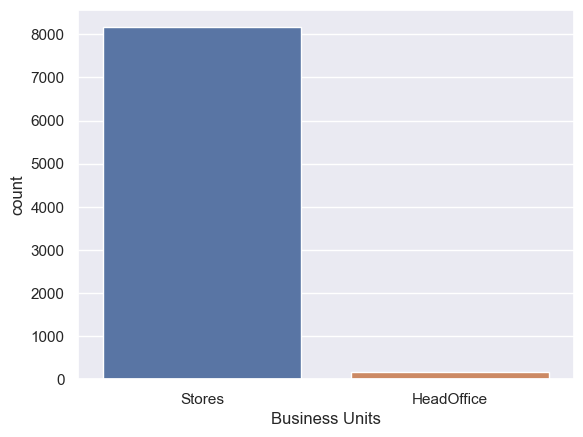

In [22]:
sns.countplot(x = 'BusinessUnit', data= df); plt.xlabel('Business Units'); plt.show()

Again we can see that the majority of division are "Stores" 

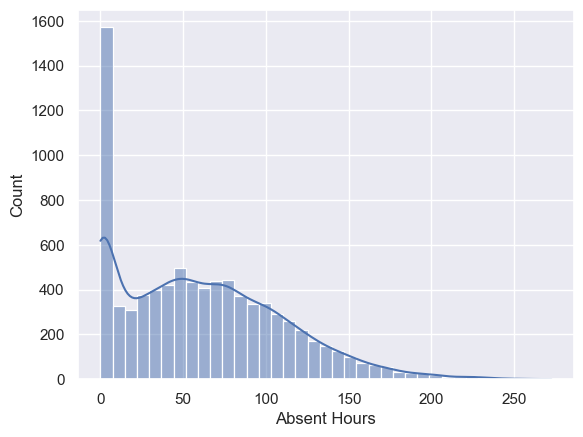

In [25]:
sns.histplot(x = 'AbsentHours', data= df, kde=True); plt.xlabel('Absent Hours'); plt.show()